In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []
        self.nodes = []
        
    
    def addNode(self, value):
        self.nodes.append(value)
    
    
    def addEdge(self, u, v, w):
        #u>>source #v>>destination #w>>weight
        self.graph.append([u,v,w])
   
    
    def print_sol(self, dist):
        #dist>>distance
        print("Vertex Distances From Source")
        for key,value in dist.items():
            print('   ' + key, ':  ', value)
    
    def bellmanFord(self,src):
        #src>>source vertex
        
        dist = {i : float("Inf") for i in self.nodes}
        dist[src] = 0
        
        
        #loop for V-1 times (number of vertices -1)
        for _ in range(self.V-1):
            for u,v,w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w
                
                
        #check whether there is a negative weighted cycle
        #we make loop for n-1 times. this one gonna be n.relaxation
        #if still(after n-1 loop) there is change in distance of vertices, this means that there is a negative weighted cycle.
        
        for u,v,w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph has negative weighted cycle.")
                return
            
        self.print_sol(dist)
        
   
    
    
    def draw_graph(self):
        G = nx.DiGraph()
        for u, v, w in self.graph:
            G.add_edge(u, v, weight=w)

        pos = nx.spring_layout(G, k=10, iterations=10)
        edge_labels = {(u, v): w for u, v, w in self.graph}

        labels = {i: i for i in self.nodes}

        edge_colors = ['g' if w >= 0 else 'r' for u, v, w in self.graph]

        nx.draw(G, pos, with_labels=True, labels=labels, node_color='skyblue', node_size=500, font_size=8)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=20)
        nx.draw_networkx_edges(G, pos, edgelist=G.edges, edge_color=edge_colors, width=2) #G.edges comes from Networkx library

        plt.show()
 

In [3]:
G = Graph(4)

In [4]:
G.addNode("A")
G.addNode("B")
G.addNode("C")
G.addNode("D")

In [5]:
G.addEdge("A","B",4)
G.addEdge("A","D",5)
G.addEdge("C","B",-10)
G.addEdge("D","C",3)

In [6]:
G.graph

[['A', 'B', 4], ['A', 'D', 5], ['C', 'B', -10], ['D', 'C', 3]]

In [7]:
G.nodes

['A', 'B', 'C', 'D']

In [8]:
G.bellmanFord("A")

Vertex Distances From Source
   A :   0
   B :   -2
   C :   8
   D :   5


In [9]:
edge_list = [(u, v) for u, v, _ in G.graph]
edge_labels = {(u, v): w for u, v, w in G.graph}


In [10]:
print("Edge List:", edge_list)
print("Edge Labels:", edge_labels)

Edge List: [('A', 'B'), ('A', 'D'), ('C', 'B'), ('D', 'C')]
Edge Labels: {('A', 'B'): 4, ('A', 'D'): 5, ('C', 'B'): -10, ('D', 'C'): 3}


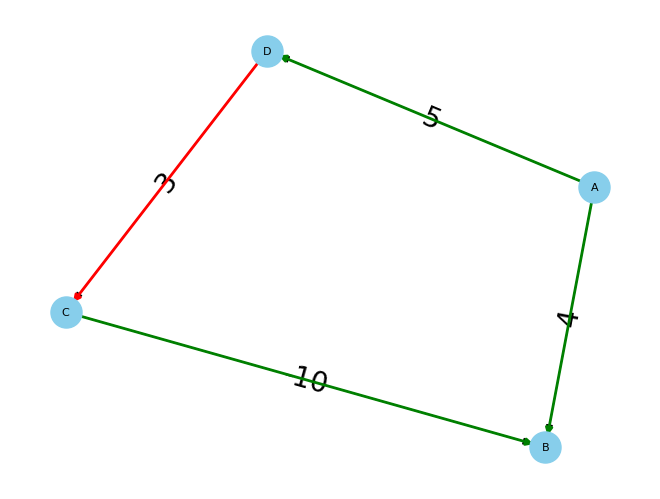

In [15]:
G.draw_graph()

## what happens when there's a negative weighted cycle? example:

In [16]:
G2 = Graph(4)

In [17]:
G2.addNode("A")
G2.addNode("B")
G2.addNode("C")
G2.addNode("D")


In [18]:
G2.addEdge("A","B",4)
G2.addEdge("A","D",5)
G2.addEdge("B","D",5)
G2.addEdge("C","B",-10)
G2.addEdge("D","C",3)

In [19]:
G2.graph

[['A', 'B', 4], ['A', 'D', 5], ['B', 'D', 5], ['C', 'B', -10], ['D', 'C', 3]]

In [20]:
G2.nodes

['A', 'B', 'C', 'D']

In [21]:
G2.bellmanFord("A")

Graph has negative weighted cycle.


Normally, Bellman Ford algorithm relax all edges V-1 times(number of vertices-1). However, if there is a negative weighted cycle as below, it goes V. times relaxation. While we're waiting -no change in distance values of vertices- , vertices keep changing. It goes infinite relaxation.

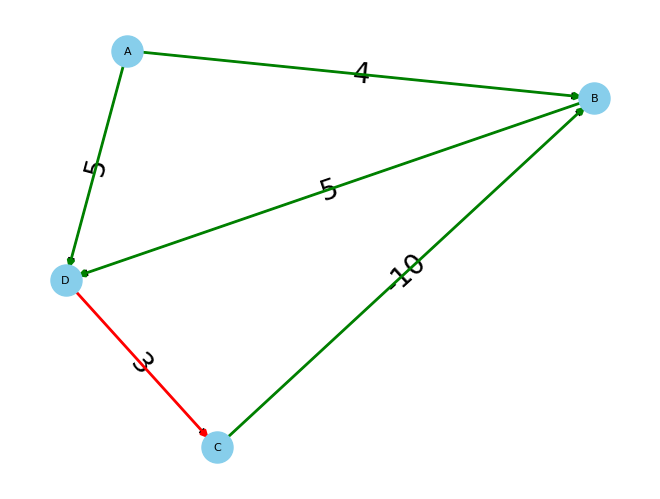

In [22]:
G2.draw_graph()

as shown in below picture, this negative weighted cycle cause infinite relaxation.

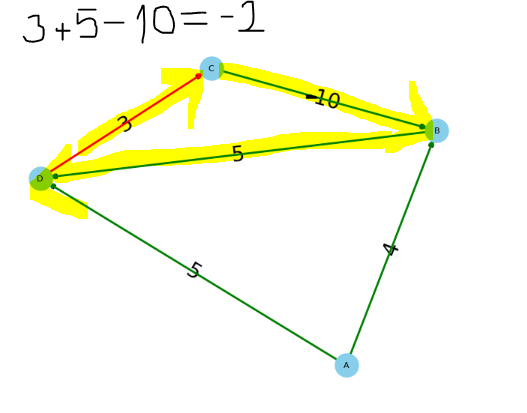